Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Defining some useful functions

In [2]:
def conv(A : np.ndarray, b : np.ndarray, stride = 1):
    m = A.shape[0]
    n = b.shape[0]
    # print(f"m = {m}, n = {n}")
    # calculating length of final matrix
    l = 0
    for i in range(1,m+2-n,stride):
        l += 1
    # print(f'l = {l}')
    ans = np.empty((l,l))

    # filling the answer
    i_idx = 0
    j_idx = 0 
    for i in range(0,m+1-n,stride):
        for j in range(0,m+1-n,stride):
            # print(f'i = {i}, j = {j}')
            ans[i_idx,j_idx] = np.multiply(A[i:i+n,j:j+n],b).sum()
            j_idx += 1
        j_idx = 0
        i_idx += 1

    return ans

def ReLU(A : np.ndarray):
    return np.where(A < 0, 0, A)

def norm(A : np.ndarray):
    return A/(A.sum())

def apply(img : np.ndarray, fltr : np.ndarray, stride = 1):
    ans = norm(ReLU(conv(img[:, :, 0], fltr, stride)))
    ans += norm(ReLU(conv(img[:,:,1], fltr, stride)))
    ans += norm(ReLU(conv(img[:,:,2], fltr, stride)))
    return ans

Reading Image into a numpy array named **img**

In [3]:
img = plt.imread('mario.png')
img.size, img.shape, img.ndim

(460320, (274, 560, 3), 3)

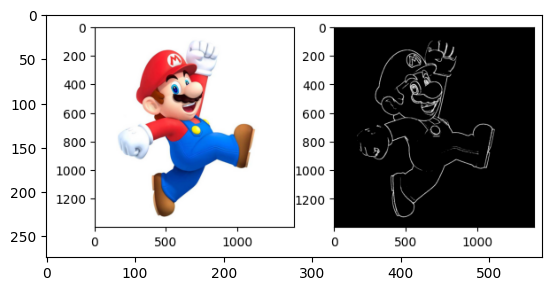

In [4]:
plt.imshow(img);

In [5]:
width = img.shape[1]
height = img.shape[0]

Since the image has axes and output also, so we want to crop and keep the mario image only.<br>
let us try 10% to 40% width and 20% to 70% height

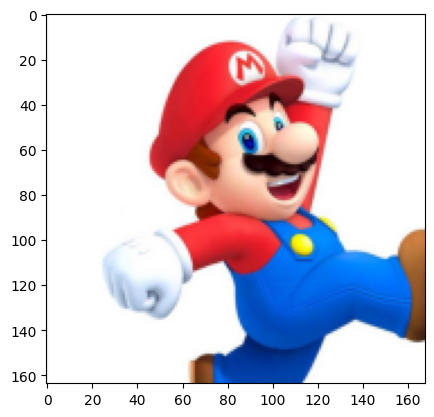

In [6]:
plt.imshow(img[math.ceil(height/10):math.ceil(7*height/10), math.ceil(width/10):math.ceil(4*width/10), :]);

Finally correcting the edges for the _last time_ and making it a square matrix.

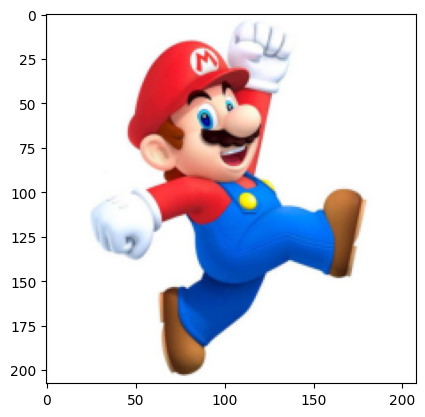

In [7]:
plt.imshow(img[math.ceil(0.09*height):math.ceil(0.85*height), math.ceil(0.1*width):math.ceil(0.45*width)+12, :]);

In [8]:
img = img[math.ceil(0.09*height):math.ceil(0.85*height), math.ceil(0.1*width):math.ceil(0.45*width)+12, :]
img.shape

(208, 208, 3)

Let us apply basic convolution of the left edge detector filter on each channel:<br>1 0 -1<br>1 0 -1<br>1 0 -1

In [9]:
fltr1 = np.array([[1, 0, -1]]*3)
fltr1

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

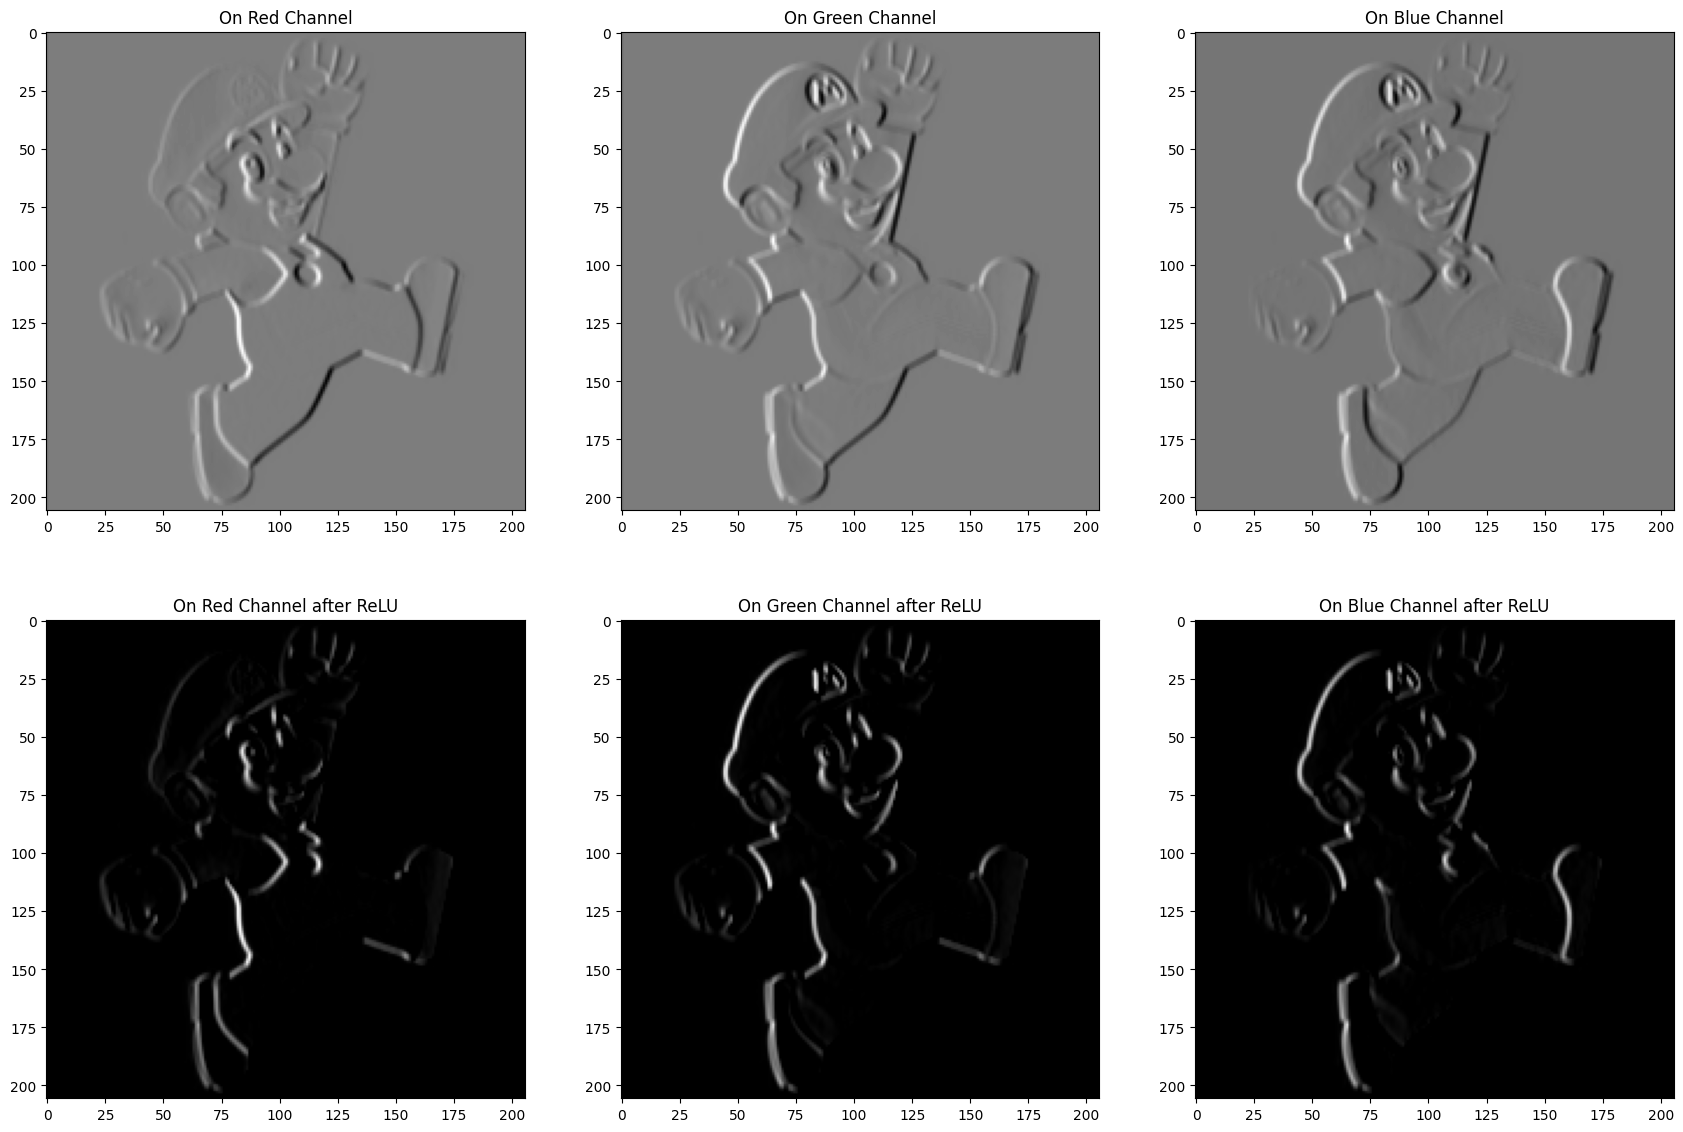

In [10]:
plt.figure(figsize=(21,14))

plt.subplot(2,3,1)
plt.imshow(conv(img[:, :, 0], fltr1), cmap='gray');
plt.title('On Red Channel')

plt.subplot(2,3,2)
plt.imshow(conv(img[:, :, 1], fltr1), cmap='gray');
plt.title('On Green Channel')

plt.subplot(2,3,3)
plt.imshow(conv(img[:, :, 2], fltr1), cmap='gray');
plt.title('On Blue Channel');

# after ReLU
plt.subplot(2,3,4)
plt.imshow(ReLU(conv(img[:, :, 0], fltr1)), cmap='gray');
plt.title('On Red Channel after ReLU')

plt.subplot(2,3,5)
plt.imshow(ReLU(conv(img[:, :, 1], fltr1)), cmap='gray');
plt.title('On Green Channel after ReLU')

plt.subplot(2,3,6)
plt.imshow(ReLU(conv(img[:, :, 2], fltr1)), cmap='gray');
plt.title('On Blue Channel after ReLU');

Similarly we can apply right edge detector : <br>-1 0 1<br>-1 0 1<br>-1 0 1

In [11]:
fltr2 = np.array([[-1, 0, 1]]*3)
fltr2

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

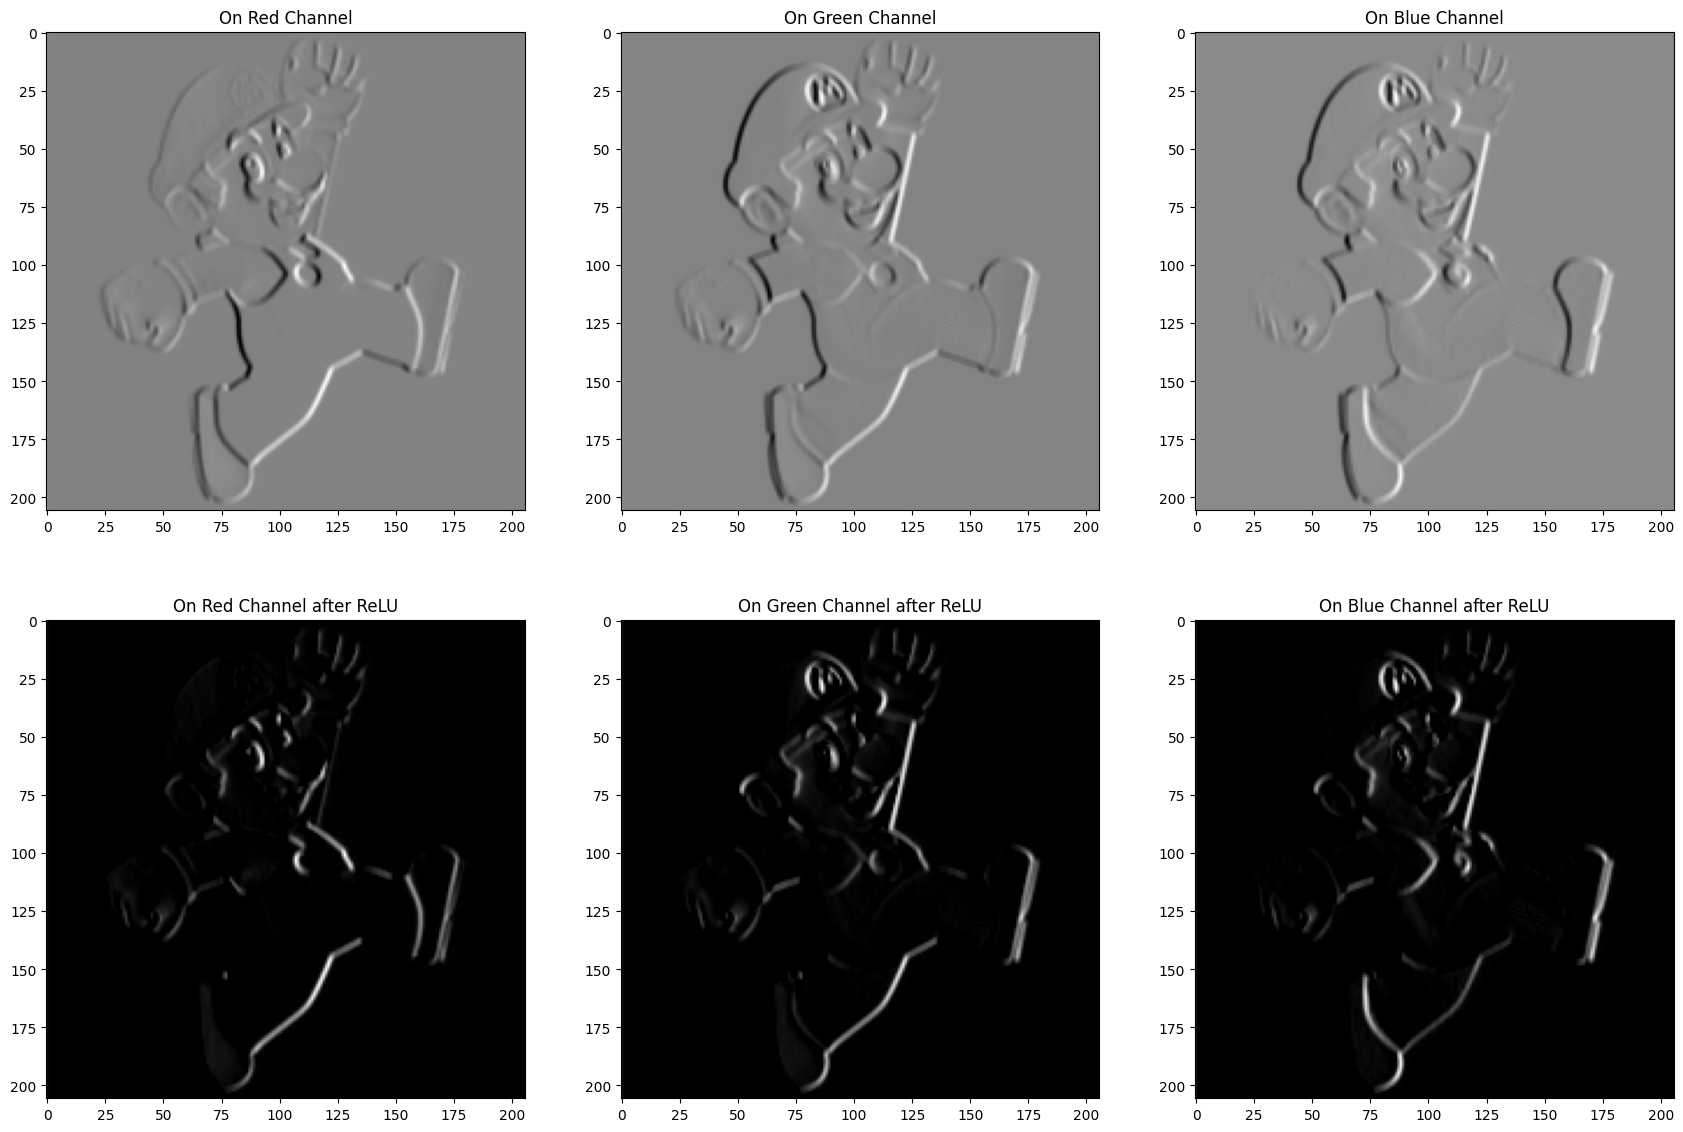

In [12]:
plt.figure(figsize=(21,14))

plt.subplot(2,3,1)
plt.imshow(conv(img[:, :, 0], fltr2), cmap='gray');
plt.title('On Red Channel')

plt.subplot(2,3,2)
plt.imshow(conv(img[:, :, 1], fltr2), cmap='gray');
plt.title('On Green Channel')

plt.subplot(2,3,3)
plt.imshow(conv(img[:, :, 2], fltr2), cmap='gray');
plt.title('On Blue Channel');

# after ReLU
plt.subplot(2,3,4)
plt.imshow(ReLU(conv(img[:, :, 0], fltr2)), cmap='gray');
plt.title('On Red Channel after ReLU')

plt.subplot(2,3,5)
plt.imshow(ReLU(conv(img[:, :, 1], fltr2)), cmap='gray');
plt.title('On Green Channel after ReLU')

plt.subplot(2,3,6)
plt.imshow(ReLU(conv(img[:, :, 2], fltr2)), cmap='gray');
plt.title('On Blue Channel after ReLU');

Similarly applying vertical edge detectors

In [13]:
fltr3 = np.array([[1, 0, -1]]*3).T
fltr4 = np.array([[-1, 0, 1]]*3).T
print(fltr3)
print(fltr4)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


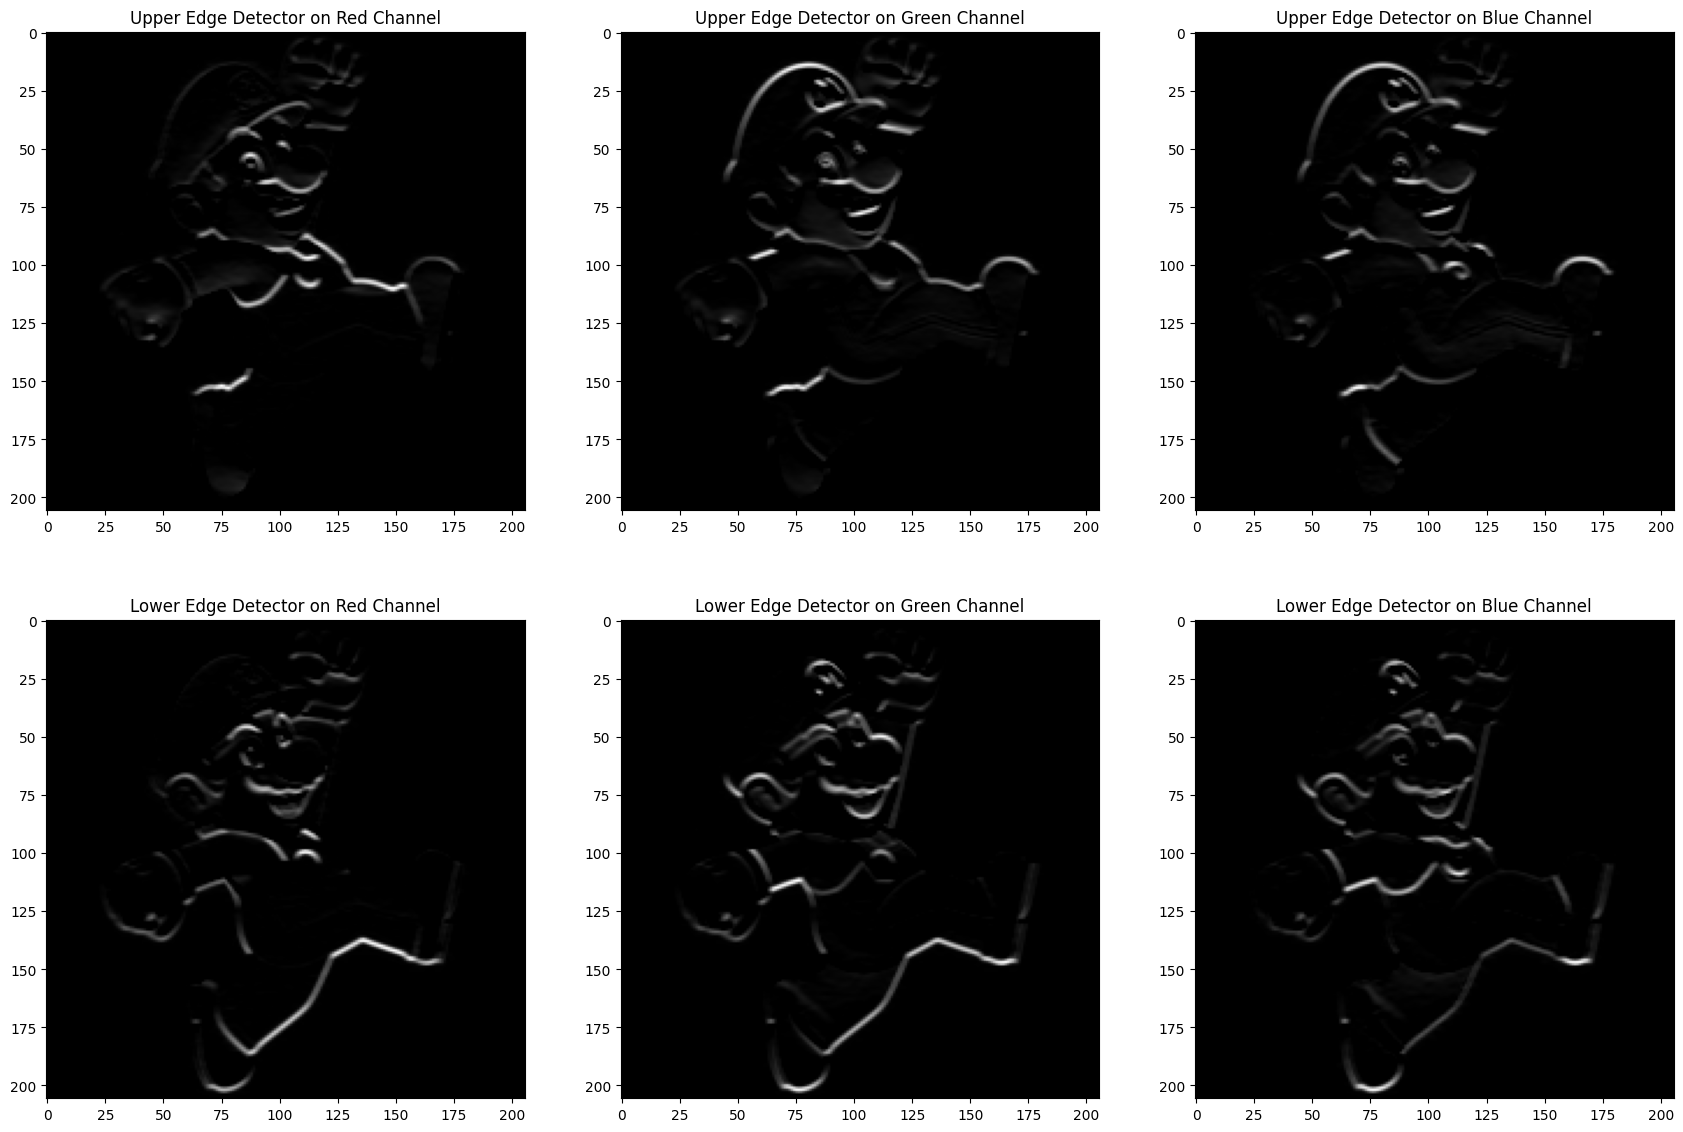

In [14]:
plt.figure(figsize=(21,14))

plt.subplot(2,3,1)
plt.imshow(ReLU(conv(img[:, :, 0], fltr3)), cmap='gray');
plt.title('Upper Edge Detector on Red Channel')

plt.subplot(2,3,2)
plt.imshow(ReLU(conv(img[:, :, 1], fltr3)), cmap='gray');
plt.title('Upper Edge Detector on Green Channel')

plt.subplot(2,3,3)
plt.imshow(ReLU(conv(img[:, :, 2], fltr3)), cmap='gray');
plt.title('Upper Edge Detector on Blue Channel');

# after ReLU
plt.subplot(2,3,4)
plt.imshow(ReLU(conv(img[:, :, 0], fltr4)), cmap='gray');
plt.title('Lower Edge Detector on Red Channel')

plt.subplot(2,3,5)
plt.imshow(ReLU(conv(img[:, :, 1], fltr4)), cmap='gray');
plt.title('Lower Edge Detector on Green Channel')

plt.subplot(2,3,6)
plt.imshow(ReLU(conv(img[:, :, 2], fltr4)), cmap='gray');
plt.title('Lower Edge Detector on Blue Channel');

A Good way to visulaise the complete edges will be to add the result from the two vertical and two horizontal edge detectors

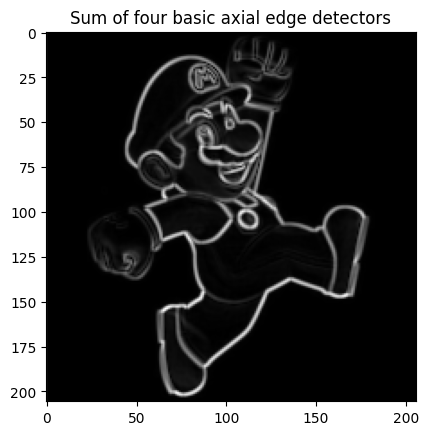

In [15]:
net = apply(img, fltr1)
net += apply(img, fltr2)
net += apply(img, fltr3)
net += apply(img, fltr4)
plt.imshow(net, cmap='gray');
plt.title('Sum of four basic axial edge detectors');

We can apply thresholding to fine the edhes, i.e. since these edge detection methods are gradient-based, we can preserve the value of a pixel if it is greater the ones in positive and negative direction of gradient. For example while detecting edges in horizontal direction, we can preserve value of a pixel if it is greater than values in its left and right pixels and supress the latter two to make the horizontal edges finer.

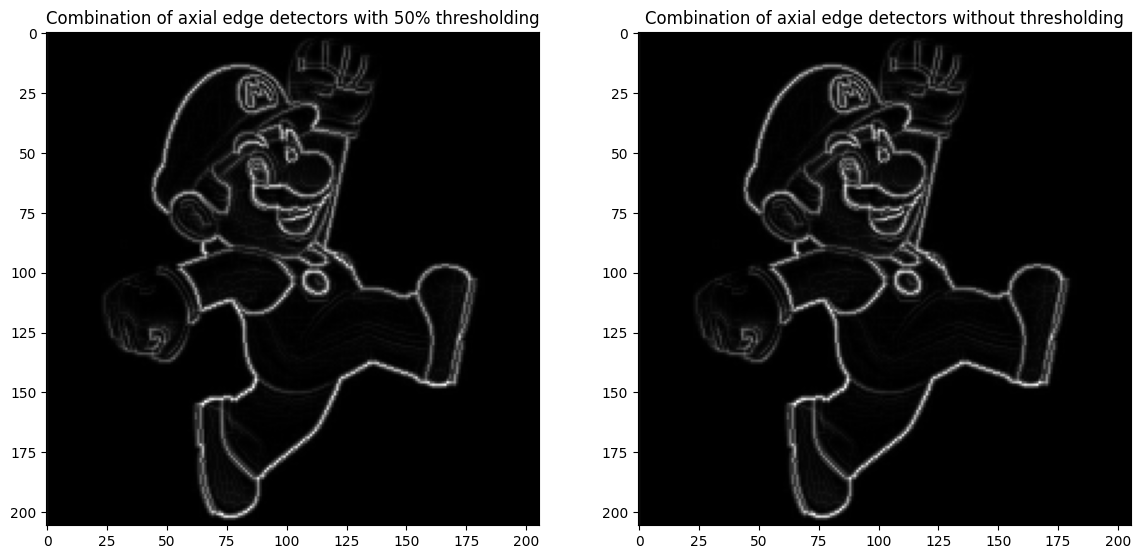

In [16]:
# thresholding in x direction
net_50_x = apply(img, fltr1)
net_50_x += apply(img, fltr2)
net_x = net_50_x
n = net_50_x.shape[0]
for i in range(0,n):
    for j in range(1,n-1):
        if net_50_x[i,j] >= net_50_x[i,j+1] and net_50_x[i,j] >= net_50_x[i,j-1]:
            continue
        else: 
            net_50_x[i,j] /= 2

# thresholding in y direction
net_50_y = apply(img, fltr3)
net_50_y += apply(img, fltr4)
net_y = net_50_y
for i in range(1,n-1):
    for j in range(0,n):
        if net_50_y[i,j] >= net_50_y[i+1,j] and net_50_y[i,j] >= net_50_y[i-1,j]:
            continue
        else:
            net_50_y[i,j] /= 2

net_50 = net_50_x + net_50_y
net = net_x + net_y
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(net_50, cmap = 'gray')
plt.title('Combination of axial edge detectors with 50% thresholding');

plt.subplot(1,2,2)
plt.imshow(net, cmap = 'gray')
plt.title('Combination of axial edge detectors without thresholding');


Applying Sobel-Feldman Operator

In [17]:
Sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Sy = Sx.T
print(Sx, Sy, sep='\n')

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


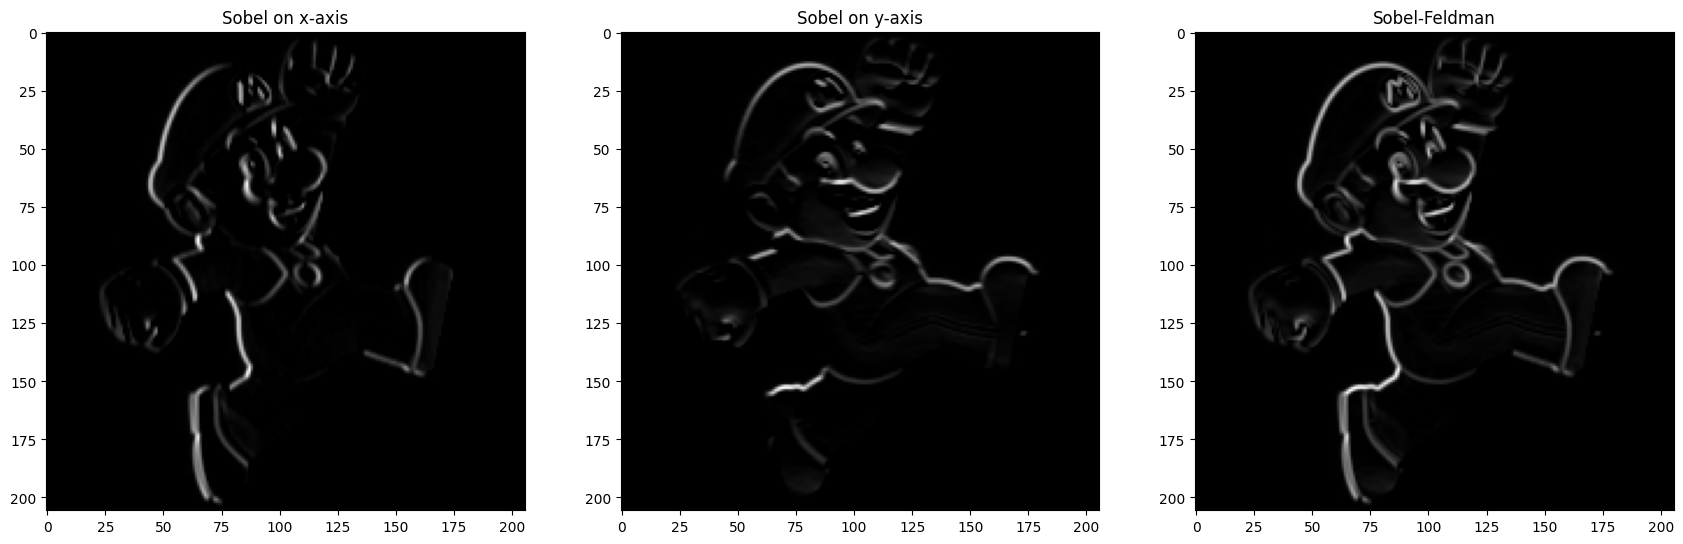

In [18]:
feat_map_x = apply(img, Sx)
feat_map_y = apply(img, Sy)
feat_map_sobel = np.sqrt((feat_map_x**2 + feat_map_y**2))

plt.figure(figsize=(21, 7))
plt.subplot(1,3,1)
plt.imshow(feat_map_x, cmap='gray')
plt.title('Sobel on x-axis')

plt.subplot(1,3,2)
plt.imshow(feat_map_y, cmap='gray')
plt.title('Sobel on y-axis')

plt.subplot(1,3,3)
plt.imshow(feat_map_sobel, cmap='gray')
plt.title('Sobel-Feldman');

Applying Robert Operator

In [19]:
Rx1 = np.array([[1,0,0],[0,0,0],[0,0,-1]])
Rx2 = -Rx1
Ry1 = np.array([[0,0,1],[0,0,0],[-1,0,0]])
Ry2 = -Ry1

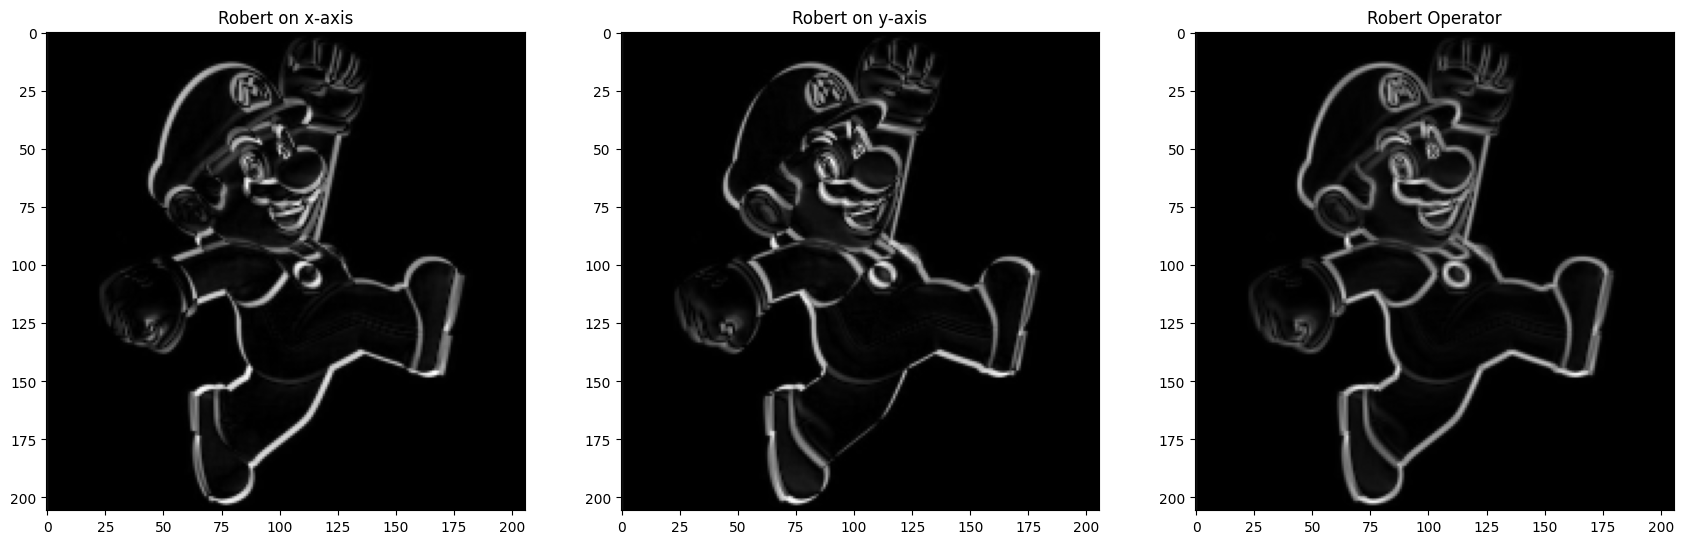

In [20]:
feat_map_Rx = apply(img, Rx1) + apply(img, Rx2)
feat_map_Ry = apply(img, Ry1) + apply(img, Ry2)
feat_map_Robert = np.sqrt(feat_map_Rx**2 + feat_map_Ry**2)

plt.figure(figsize=(21, 7))
plt.subplot(1,3,1)
plt.imshow(feat_map_Rx, cmap='gray')
plt.title('Robert on x-axis')

plt.subplot(1,3,2)
plt.imshow(feat_map_Ry, cmap='gray')
plt.title('Robert on y-axis')

plt.subplot(1,3,3)
plt.imshow(feat_map_Robert, cmap='gray')
plt.title('Robert Operator');